In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to the directories containing face and non-face images
face_directory = "/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/face"
nonface_directory = "/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/nonface"

# Output directories for train, test, and validate sets
train_directory = "/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/HOG/Train"
test_directory = "/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/HOG/Test"
val_directory = "/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/HOG/Val"

# Create output directories if they don't exist
os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)
os.makedirs(val_directory, exist_ok=True)

# Function to split images into train, test, and validate sets
def split_images(source_directory, train_dir, test_dir, val_dir, test_size=0.1, val_size=0.2):
    # Get a list of all files in the source directory
    files = os.listdir(source_directory)

    # Split files into train and temp sets
    train_files, temp_files = train_test_split(files, test_size=(test_size + val_size))
    # Split temp files into test and val sets
    test_files, val_files = train_test_split(temp_files, test_size=(val_size / (test_size + val_size)))

    # Copy images to respective directories
    for file in train_files:
        shutil.copy(os.path.join(source_directory, file), os.path.join(train_dir, file))
    for file in test_files:
        shutil.copy(os.path.join(source_directory, file), os.path.join(test_dir, file))
    for file in val_files:
        shutil.copy(os.path.join(source_directory, file), os.path.join(val_dir, file))

# Split face images into train, test, and validate sets
split_images(face_directory, os.path.join(train_directory, "face"), os.path.join(test_directory, "face"), os.path.join(val_directory, "face"))

# Split non-face images into train, test, and validate sets
split_images(nonface_directory, os.path.join(train_directory, "nonface"), os.path.join(test_directory, "nonface"), os.path.join(val_directory, "nonface"))

print("Images split into train, test, and validate sets.")


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import feature


In [ ]:
def extract_lbp_descriptor(image):
    radius = 1
    n_points = 8 * radius
    lbp = feature.local_binary_pattern(image, n_points, radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)

    return hist


In [ ]:
def process_images_in_directory(directory_path):
    lbp_descriptors = []

    for filename in os.listdir(directory_path):
        if filename.endswith(".jpg"):  # Assuming images are in JPG format
            image_path = os.path.join(directory_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            resized_image = cv2.resize(image, (64, 128))  # Resize to a standard size

            lbp_descriptor = extract_lbp_descriptor(resized_image)
            lbp_descriptors.append(lbp_descriptor)

    return lbp_descriptors


#Face

In [ ]:
train_lbps = process_images_in_directory('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Train/face')
val_lbps = process_images_in_directory('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Val/face')
test_lbps = process_images_in_directory('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Test/face')

# Convert to DataFrame and save as CSV
train_lbp_df = pd.DataFrame(train_lbps)
val_lbp_df = pd.DataFrame(val_lbps)
test_lbp_df = pd.DataFrame(test_lbps)

train_lbp_df.to_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Trainface.csv', index=False)
val_lbp_df.to_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Valface.csv', index=False)
test_lbp_df.to_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Testface.csv', index=False)


In [ ]:
import pandas as pd

# Load the CSV file
df1 = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Trainface.csv')

# Add a new column 'label' with the value 'face'
df1['label'] = 'face'

# Save the DataFrame back to a new CSV file
df1.to_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/l1Trainface.csv', index=False)


In [ ]:
# Load the CSV file
df2 = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Valface.csv')

# Add a new column 'label' with the value 'face'
df2['label'] = 'face'

# Save the DataFrame back to a new CSV file
df2.to_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/l1Valface.csv', index=False)


In [ ]:
# Load the CSV file
df3 = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Testface.csv')

# Add a new column 'label' with the value 'face'
df3['label'] = 'face'

# Save the DataFrame back to a new CSV file
df3.to_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/l1Testface.csv', index=False)


#Non-FAce

In [ ]:
train_lbps = process_images_in_directory('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Train/nonface')
val_lbps = process_images_in_directory('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Val/nonface')
test_lbps = process_images_in_directory('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Test/nonface')

# Convert to DataFrame and save as CSV
train_lbp_df = pd.DataFrame(train_lbps)
val_lbp_df = pd.DataFrame(val_lbps)
test_lbp_df = pd.DataFrame(test_lbps)

train_lbp_df.to_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Trainnonface.csv', index=False)
val_lbp_df.to_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Valnonface.csv', index=False)
test_lbp_df.to_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Testnonface.csv', index=False)


In [ ]:
# Load the CSV file
df1 = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Trainnonface.csv')

# Add a new column 'label' with the value 'face'
df1['label'] = 'nonface'

# Save the DataFrame back to a new CSV file
df1.to_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/l2Trainnonface.csv', index=False)

# Load the CSV file
df2 = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Valnonface.csv')

# Add a new column 'label' with the value 'nonface'
df2['label'] = 'nonface'

# Save the DataFrame back to a new CSV file
df2.to_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/l2Valnonface.csv', index=False)

# Load the CSV file
df3 = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Testnonface.csv')

# Add a new column 'label' with the value 'face'
df3['label'] = 'nonface'

# Save the DataFrame back to a new CSV file
df3.to_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/l2Testnonface.csv', index=False)

#SVD

One-vs-Rest SVM classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

train_csv_path = '/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/LBPTrain - Sheet1.csv'

# Load the CSV file into a Pandas DataFrame
train_df = pd.read_csv(train_csv_path)

# Load validation data
val_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/LBPval - Sheet1.csv')
X_val = val_df.drop('label', axis=1)
y_val = val_df['label']

# Standardize features
scaler = StandardScaler()
X_val_std = scaler.fit_transform(X_val)

# Define the parameter grid for GridSearchCV
param_grid = {
    'estimator__C': [1, 10, 100],  # You can specify other values as well
    'estimator__kernel': ['linear', 'rbf']  # Choose appropriate kernels
}

# Perform GridSearchCV to find the best parameters
svm = SVC(probability=True)
ovr_svm = OneVsRestClassifier(svm)
grid_search = GridSearchCV(ovr_svm, param_grid, cv=5)
grid_search.fit(X_val_std, y_val)

# Get the best parameters
best_C = grid_search.best_params_['estimator__C']
best_kernel = grid_search.best_params_['estimator__kernel']

# Train One-vs-Rest SVM classifier with best parameters using the combined train and validation data
X_train_combined = np.concatenate((train_df.drop('label', axis=1), X_val))
y_train_combined = np.concatenate((train_df['label'], y_val))
X_train_combined_std = scaler.transform(X_train_combined)

svm_classifier = OneVsRestClassifier(SVC(C=best_C, kernel=best_kernel, probability=True))
svm_classifier.fit(X_train_combined_std, y_train_combined)

# Load test data
test_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/LBPtest - Sheet1.csv')
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

# Standardize test data
X_test_std = scaler.transform(X_test)

# Predict and evaluate on test data
y_pred = svm_classifier.predict(X_test_std)
accuracy_svm = accuracy_score(y_test, y_pred)
print(f'Accuracy of One-vs-Rest SVM classifier on Test.csv: {accuracy_svm:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Accuracy of One-vs-Rest SVM classifier on Test.csv: 0.80


Collect non-face images from any source with the same number as
the face and train a binary SVM for face vs. non-face (you can use the
sklearn library for SVM)

In [ ]:
# Load train, validation, and test datasets
train_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/LBPTrain - Sheet1.csv')
val_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/LBPval - Sheet1.csv')
test_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/LBPtest - Sheet1.csv')

# Extract features (X) and labels (y) for train, validation, and test datasets
X_train, y_train = train_df.drop('label', axis=1), train_df['label']
X_val, y_val = val_df.drop('label', axis=1), val_df['label']
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = svm_classifier.predict(X_val)

# Calculate accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Accuracy on the validation set: {accuracy_val:.2f}')

# Make predictions on the test set
y_test_pred = svm_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on the test set: {accuracy_test:.2f}')


Accuracy on the validation set: 0.62
Accuracy on the test set: 0.30


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Load train, validation, and test datasets
train_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/LBPTrain - Sheet1.csv')
val_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/LBPval - Sheet1.csv')
test_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/LBPtest - Sheet1.csv')

# Extract features (X) and labels (y) for train, validation, and test datasets
X_train, y_train = train_df.drop('label', axis=1), train_df['label']
X_val, y_val = val_df.drop('label', axis=1), val_df['label']
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = svm_classifier.predict(X_train)

# Calculate accuracy on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Accuracy on the training set: {accuracy_train:.2f}')

# Make predictions on the validation set
y_val_pred = svm_classifier.predict(X_val)

# Calculate accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Accuracy on the validation set: {accuracy_val:.2f}')

# Make predictions on the test set
y_test_pred = svm_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on the test set: {accuracy_test:.2f}')


Accuracy on the training set: 0.64
Accuracy on the validation set: 0.62
Accuracy on the test set: 0.30


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
pip install joblib

In [ ]:
import joblib

# Assuming svm_classifier is your trained SVM model
# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Save the trained SVM model to a .pkl file
joblib.dump(svm_classifier, '/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/svm_model.pkl')

print("SVM model saved as svm_model.pkl")

SVM model saved as svm_model.pkl


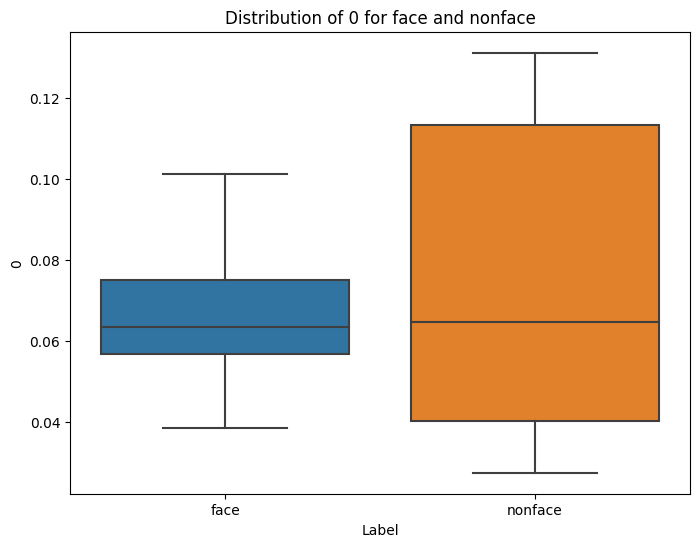

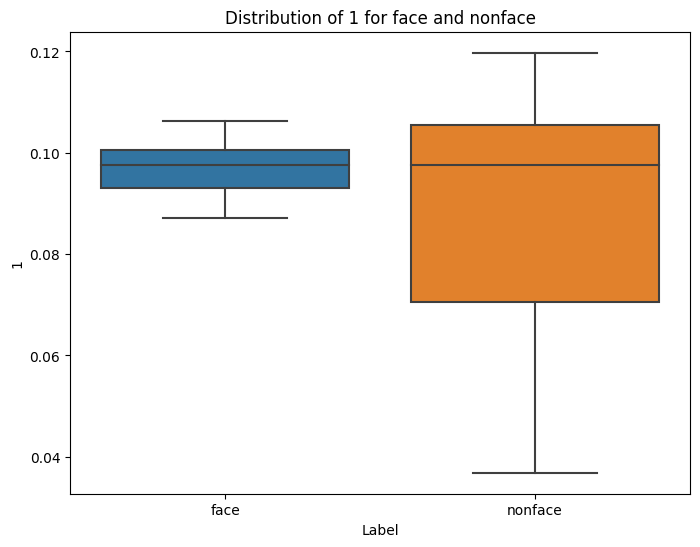

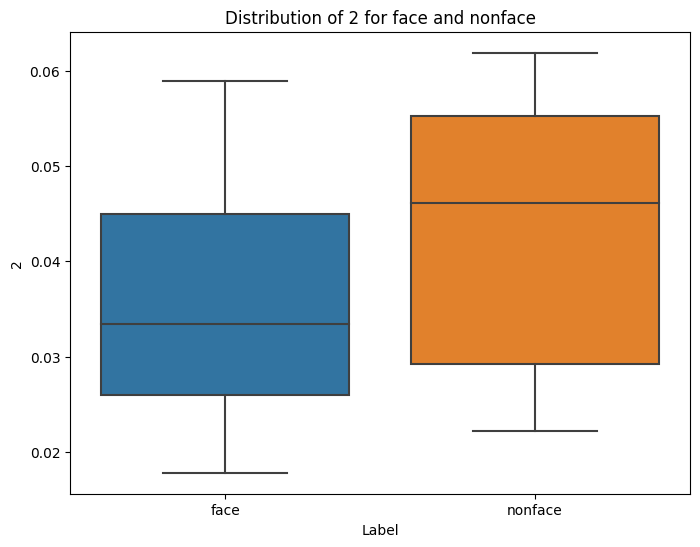

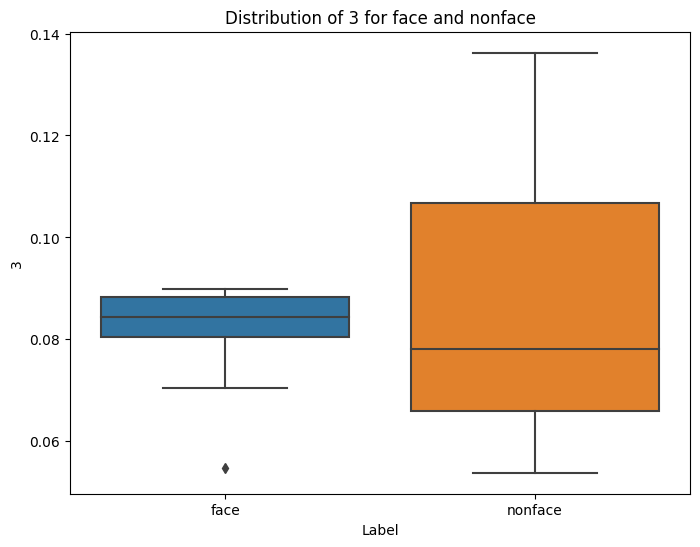

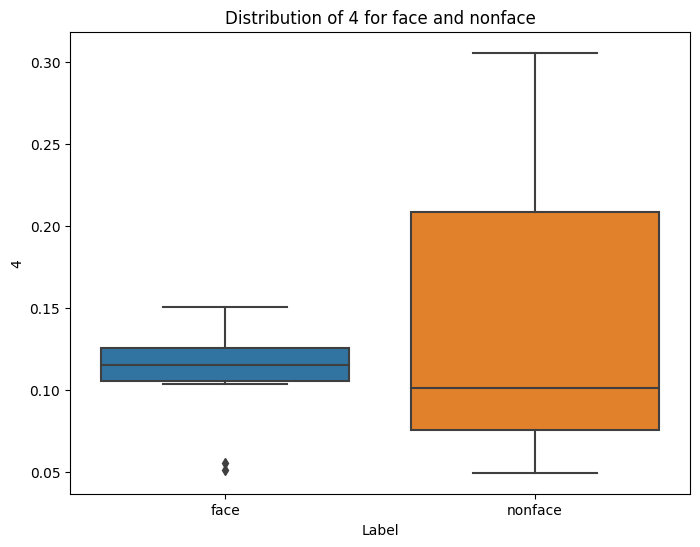

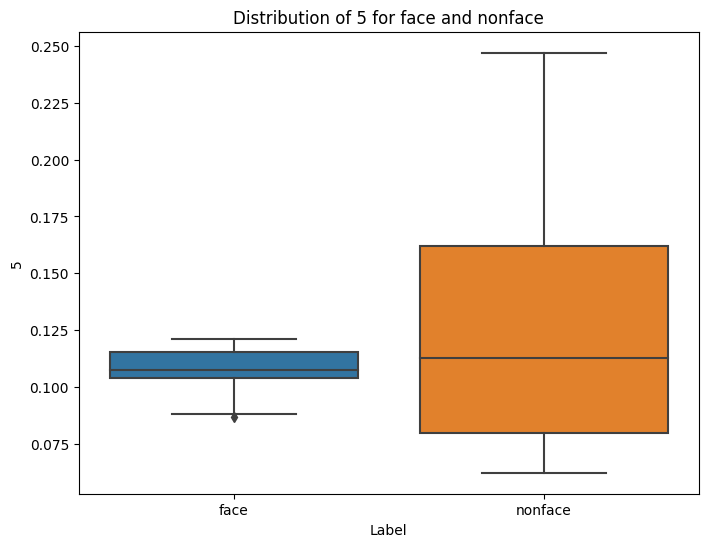

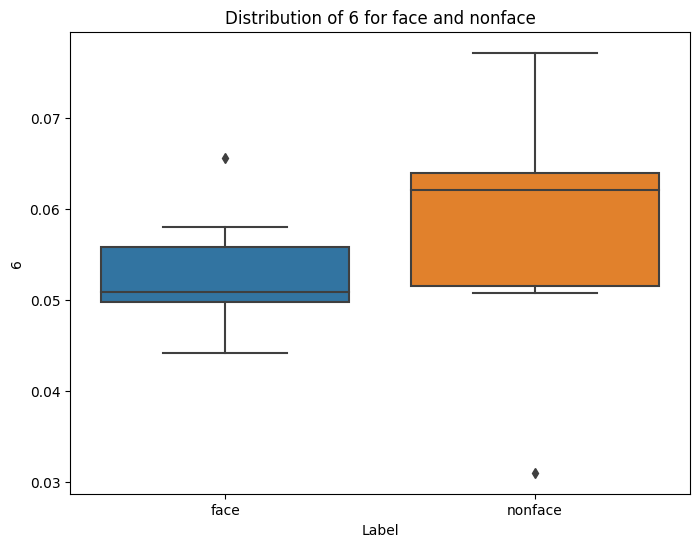

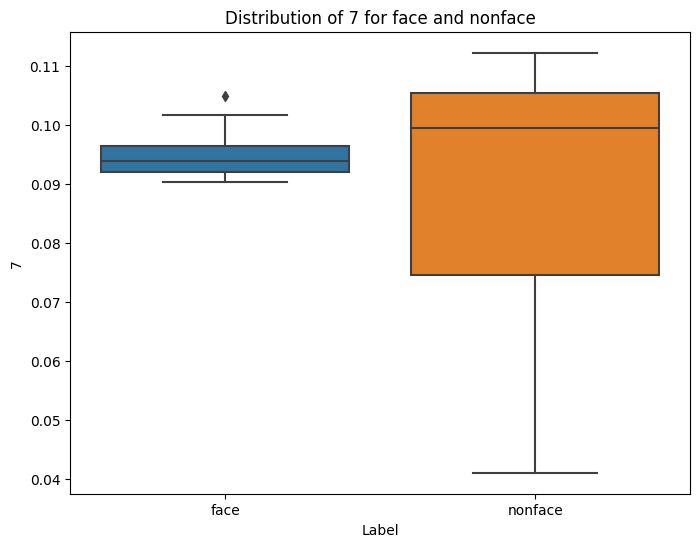

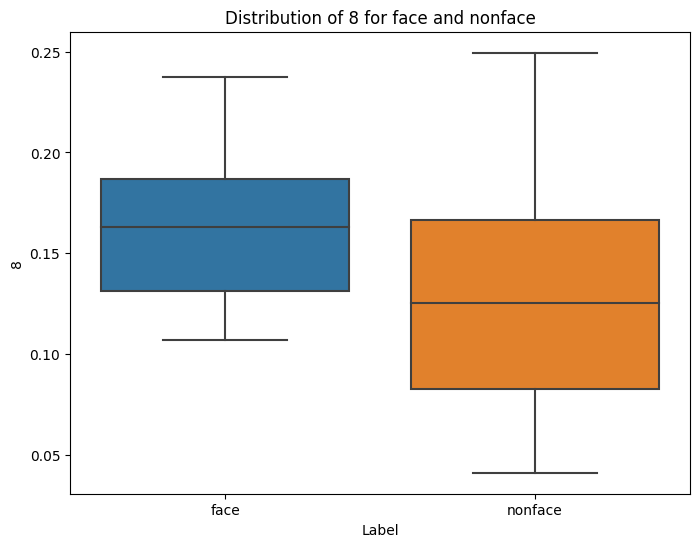

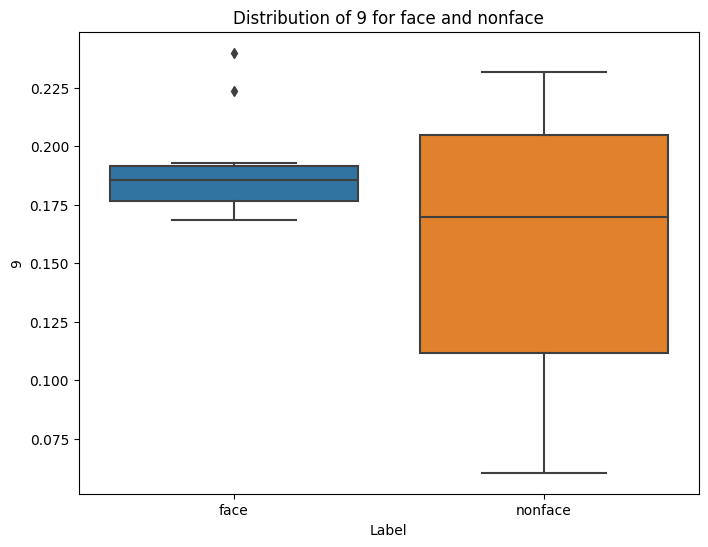

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate features and labels
features = test_df.drop('label', axis=1)
labels = test_df['label']

# Plot box plots for each feature grouped by labels
for column in features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=labels, y=features[column])
    plt.xlabel('Label')
    plt.ylabel(column)
    plt.title(f'Distribution of {column} for face and nonface')
    plt.show()


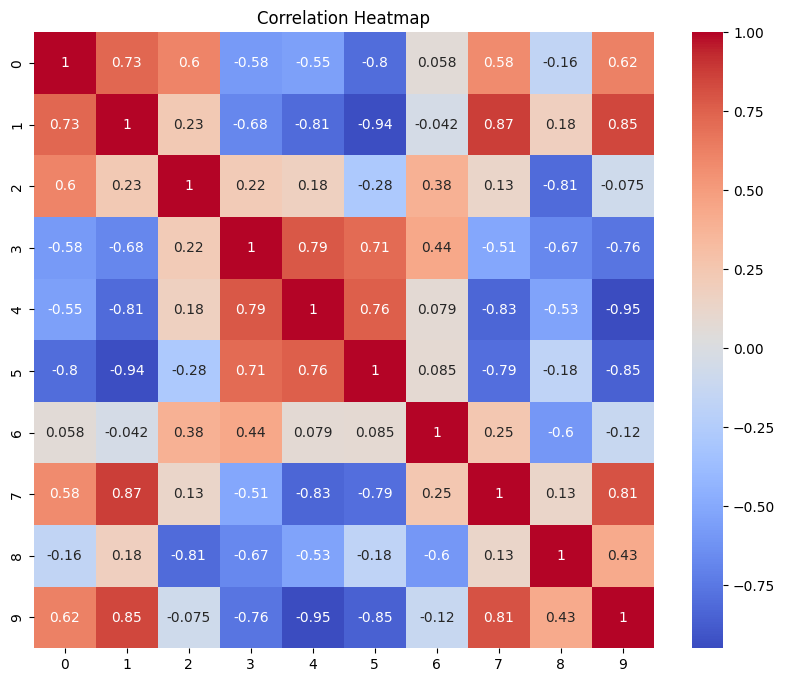

In [ ]:
# Compute the correlation matrix
correlation_matrix = features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


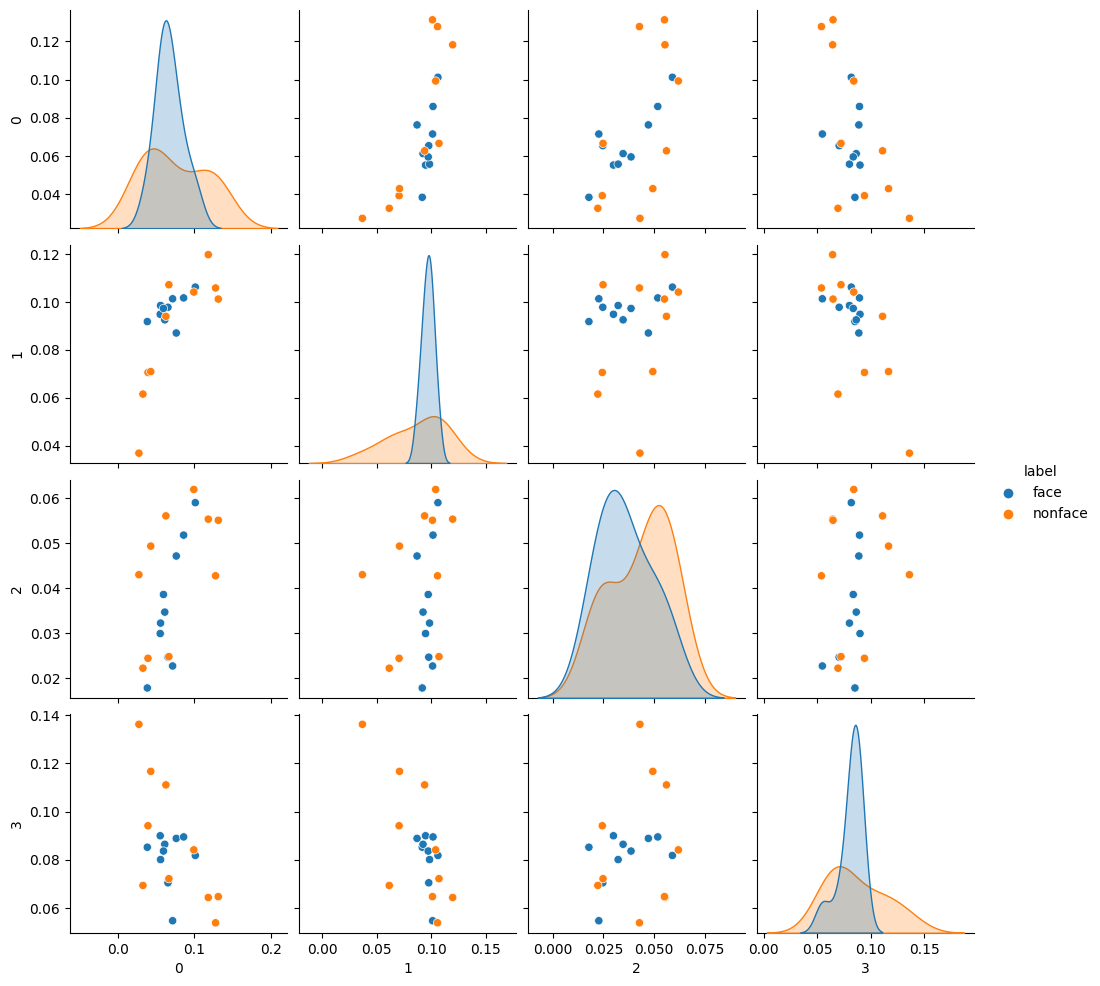

In [ ]:
# Select a subset of features for the pairplot
selected_features = ['0', '1', '2', '3']  # Choose the features you want to include

# Create the pairplot
sns.pairplot(test_df[selected_features + ['label']], hue='label', diag_kind='kde')
plt.show()


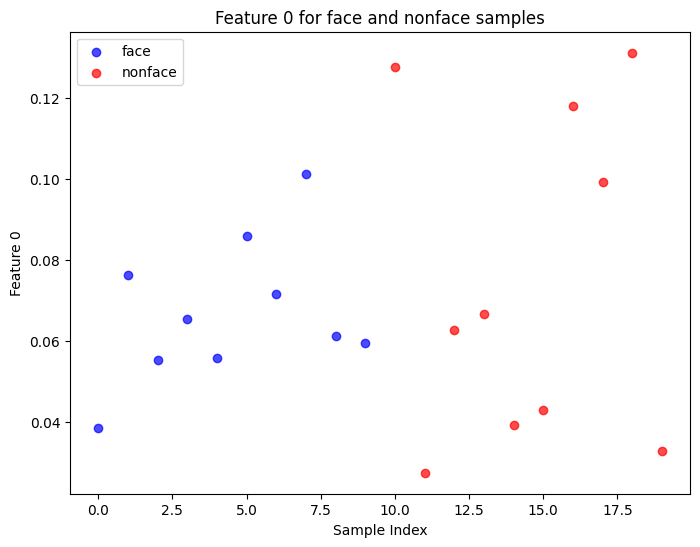

In [ ]:
import matplotlib.pyplot as plt

# Assuming your test data is loaded into a DataFrame called test_df
# Assuming the feature you want to visualize is '0' (you can change this to any other feature)

# Extract features and labels
feature_to_visualize = '0'
face_data = test_df[test_df['label'] == 'face'][feature_to_visualize]
nonface_data = test_df[test_df['label'] == 'nonface'][feature_to_visualize]

# Create a scatter plot for 'face' and 'nonface' samples
plt.figure(figsize=(8, 6))
plt.scatter(face_data.index, face_data.values, color='blue', label='face', alpha=0.7)
plt.scatter(nonface_data.index, nonface_data.values, color='red', label='nonface', alpha=0.7)

plt.xlabel('Sample Index')
plt.ylabel(f'Feature {feature_to_visualize}')
plt.title(f'Feature {feature_to_visualize} for face and nonface samples')
plt.legend()
plt.show()


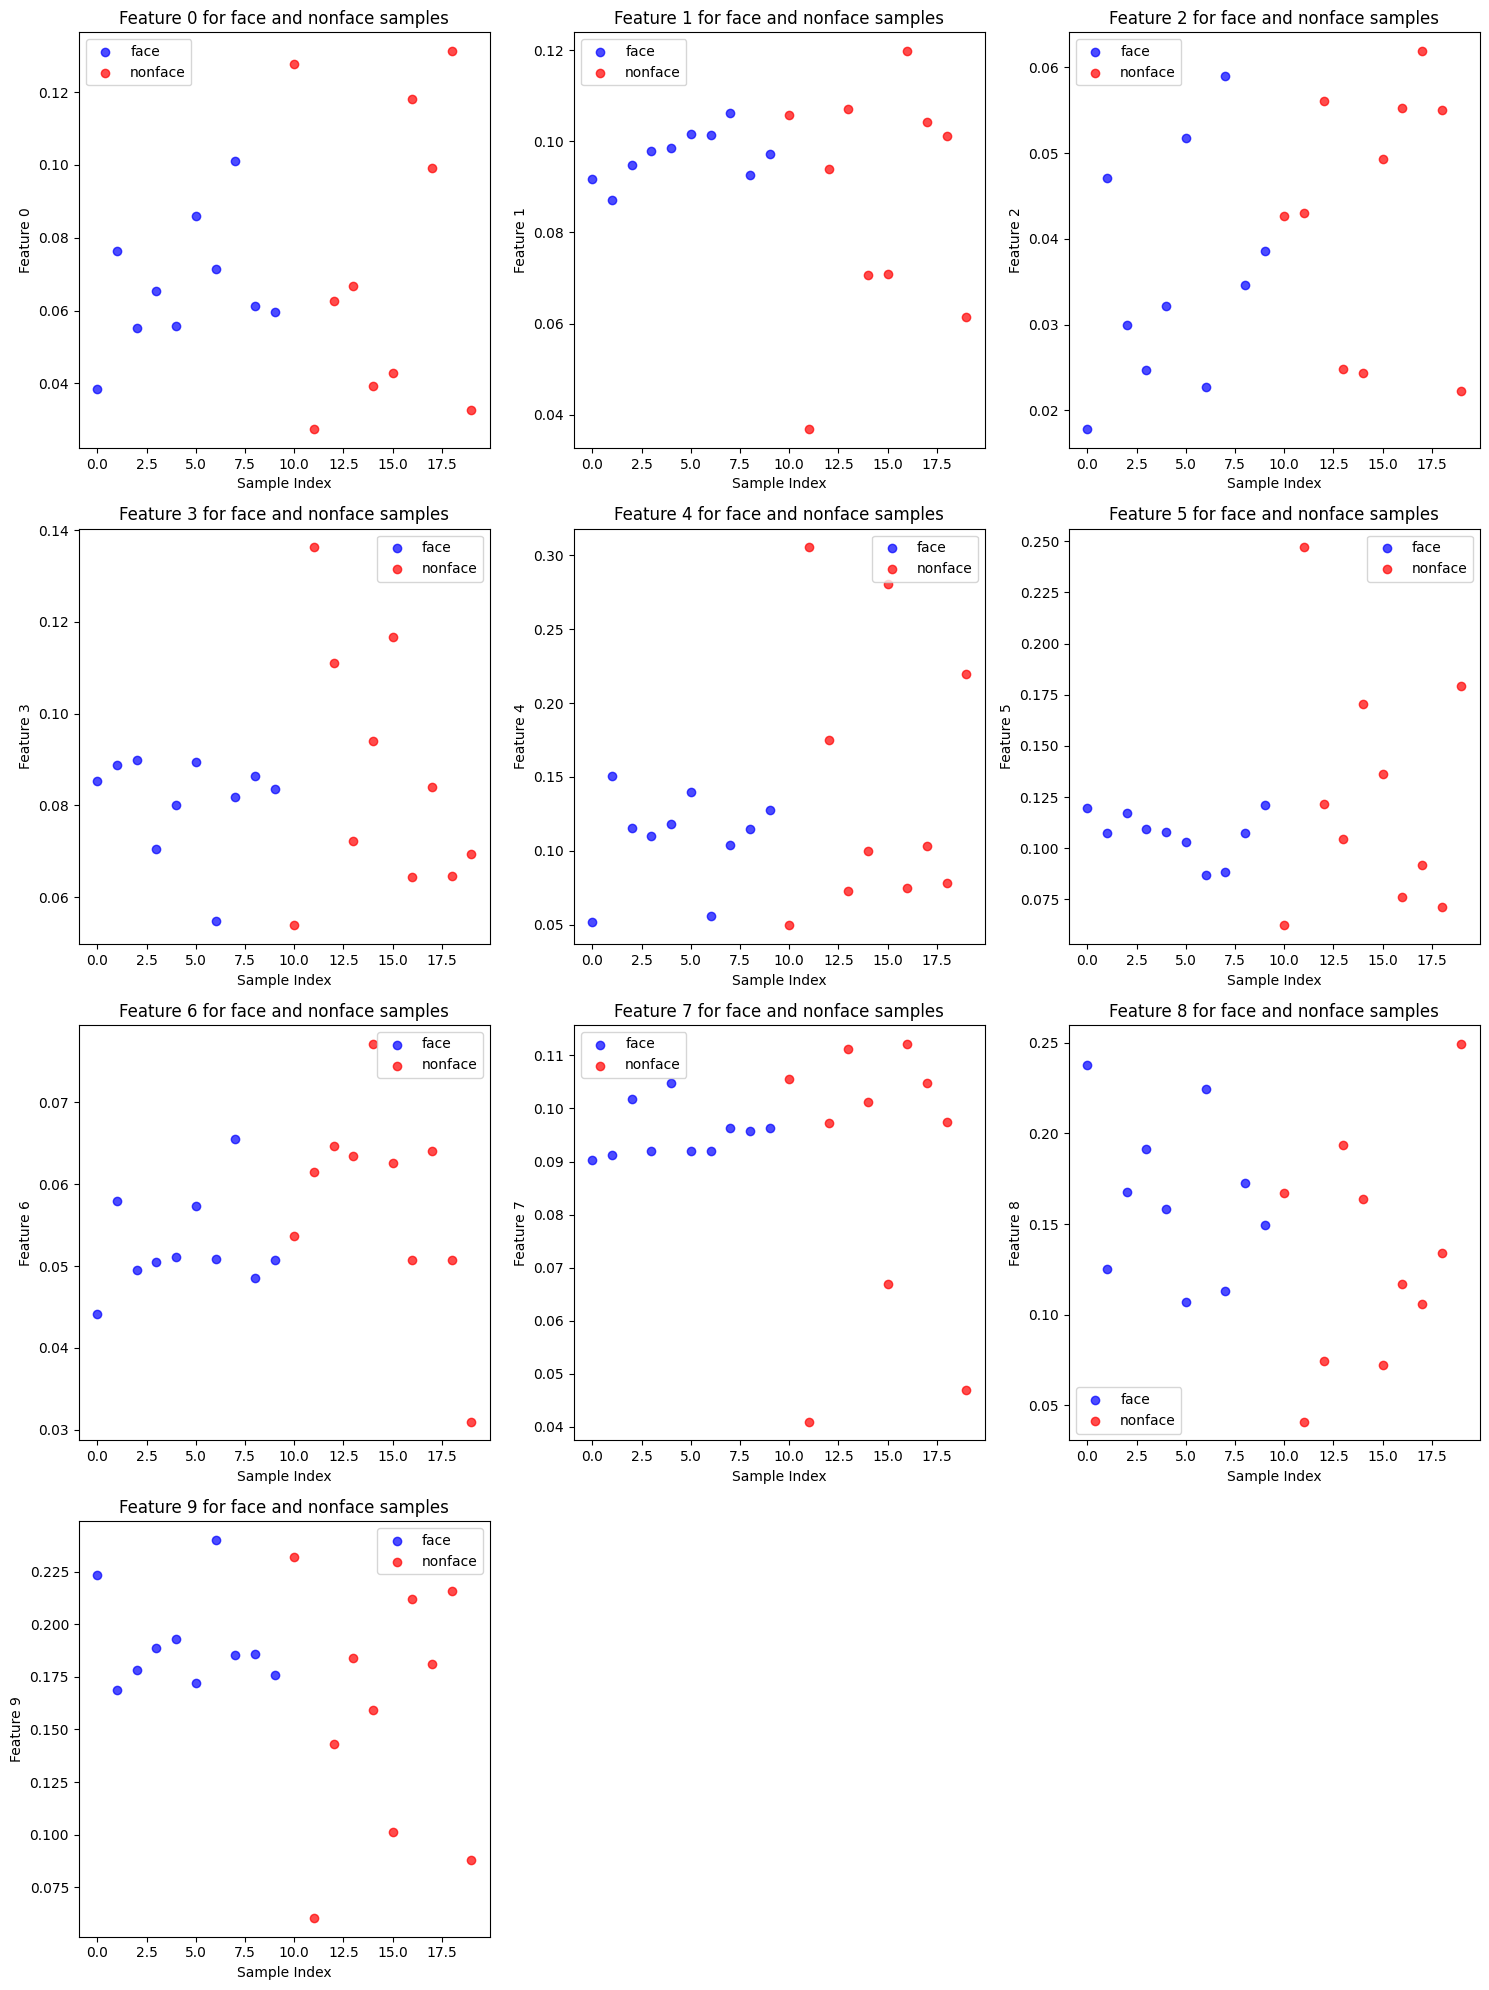

In [ ]:
import matplotlib.pyplot as plt

# Assuming your test data is loaded into a DataFrame called test_df

# Extract features and labels
features = test_df.drop('label', axis=1)
labels = test_df['label']

# Get the list of feature names
feature_names = features.columns

# Determine the number of rows and columns for subplots
num_features = len(feature_names)
num_cols = 3  # You can adjust the number of columns based on your preference
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Plot each feature as a scatter plot for 'face' and 'nonface' samples
for i, feature in enumerate(feature_names):
    ax = axes[i]
    face_data = features.loc[labels == 'face', feature]
    nonface_data = features.loc[labels == 'nonface', feature]

    ax.scatter(face_data.index, face_data.values, color='blue', label='face', alpha=0.7)
    ax.scatter(nonface_data.index, nonface_data.values, color='red', label='nonface', alpha=0.7)

    ax.set_xlabel('Sample Index')
    ax.set_ylabel(f'Feature {feature}')
    ax.set_title(f'Feature {feature} for face and nonface samples')
    ax.legend()

# Hide empty subplots
for i in range(num_features, num_cols*num_rows):
    fig.delaxes(axes[i])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Load the trained SVM model
svm_model = joblib.load('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/svm_model.pkl')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.3.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
def sliding_window(image, step=20, window_size=(64, 64)):
    for y in range(0, image.shape[0] - window_size[1], step):
        for x in range(0, image.shape[1] - window_size[0], step):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])
window_size = (64, 64)  # You can adjust the window size according to your requirements


In [ ]:
import cv2

def detect_faces(image):
    for (x, y, window) in sliding_window(image):
        # Resize the window to match the SVM input size
        resized_window = cv2.resize(window, (64, 128))

        # Extract HOG features from the window
        lbp_descriptor = extract_lbp_descriptor(resized_window)  # Use your LBP feature extraction function

        # Classify the window using the SVM model
        prediction = svm_model.predict(lbp_descriptor.reshape(1, -1))

        # If SVM predicts face (or the class label associated with faces), draw a rectangle around the detected face
        if prediction == 'face':  # Replace 'face' with your actual class label for faces
            cv2.rectangle(image, (x, y), (x + window_size[0], y + window_size[1]), (0, 255, 0), 2)

    return image


In [ ]:
from google.colab.patches import cv2_imshow

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

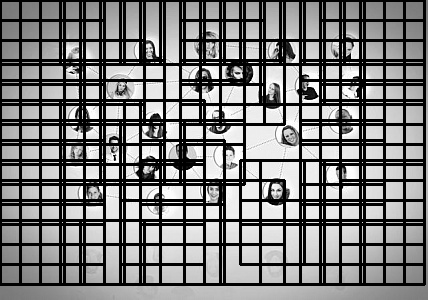

In [ ]:
# Load input image
input_image = cv2.imread('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Face/image_357.jpg')

# Convert input image to grayscale if it's a color image
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Detect faces using sliding window approach
output_image = detect_faces(gray_image)

# Display or save the output image
cv2_imshow(output_image)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

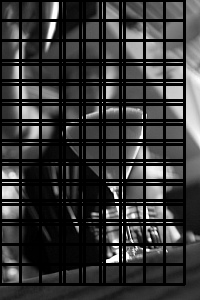

In [ ]:
# Load input image
input_image = cv2.imread('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Test/nonface/image_295.jpg')

# Convert input image to grayscale if it's a color image
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Detect faces using sliding window approach
output_image = detect_faces(gray_image)

# Display or save the output image
cv2_imshow(output_image)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

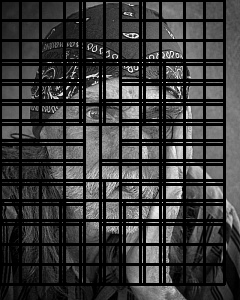

In [ ]:
# Load input image
input_image = cv2.imread('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment2/Code2/LBP/Test/face/image_163.jpg')

# Convert input image to grayscale if it's a color image
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Detect faces using sliding window approach
output_image = detect_faces(gray_image)

# Display or save the output image
cv2_imshow(output_image)

In [ ]:
print(features.shape)


(1764,)
